# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Multiclass (Iris DataSet)</b></p>1

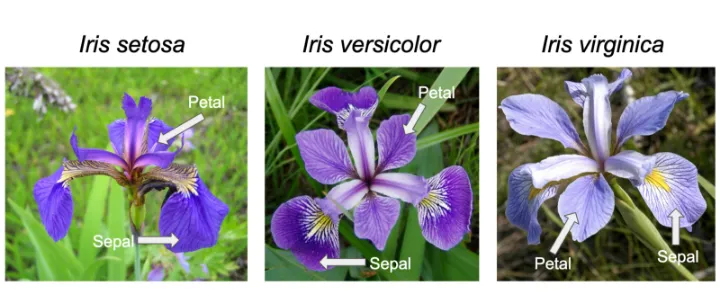

# Exploratory Data Analysis

**Dataset Overview**

The **Iris dataset** is a classic dataset frequently used in the fields of machine learning and statistics. It was first introduced by Ronald Fisher in 1936 and is commonly used to distinguish between three different species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). This dataset is widely used for training and testing classification algorithms in machine learning and statistical applications.

**Details of the Iris Dataset:**

The Iris dataset contains a total of 150 flower samples, with each species of Iris flower represented by 50 samples:

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

For each flower sample, four features have been recorded:

1. **sepal_length**: The length of the sepal (the outer part of the flower that protects the petals).
2. **sepal_width**: The width of the sepal.
3. **petal_length**: The length of the petal (the colorful, showy part of the flower).
4. **petal_width**: The width of the petal.

These features are measured in centimeters (cm).

**Objective:**

The objective is to create a model that can predict the species of the flower using these four features. In other words, the Iris dataset is used as a dataset for a supervised learning problem. The goal of the model is to accurately classify the flower species based on the given features.

**Summary:**

The Iris dataset contains 150 flower samples, each representing one of three Iris species. Four features (sepal_length, sepal_width, petal_length, petal_width) have been measured for each sample. These features are used to distinguish between the different Iris species.

- **Sepal Length:** The length of the sepal.
- **Sepal Width:** The width of the sepal.
- **Petal Length:** The length of the petal.
- **Petal Width:** The width of the petal.

This dataset is an ideal example for evaluating and comparing the performance of classification algorithms.

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


### Loading Dataset from different sources

In [ ]:
datasets_list = dir(sklearn.datasets)
print(datasets_list)

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target

df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
78,6.000,2.900,4.500,1.500,1
126,6.200,2.800,4.800,1.800,2
119,6.000,2.200,5.000,1.500,2
15,5.700,4.400,1.500,0.400,0
0,5.100,3.500,1.400,0.200,0
12,4.800,3.000,1.400,0.100,0
144,6.700,3.300,5.700,2.500,2
51,6.400,3.200,4.500,1.500,1
47,4.600,3.200,1.400,0.200,0
102,7.100,3.000,5.900,2.100,2


In [4]:
help(sklearn.datasets.load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(*, return_X_y=False, as_frame=False)
    Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============

    Read more in the :ref:`User Guide <iris_dataset>`.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.

        .. versionadded:: 0.18

    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). The target is
        a 

In [5]:
df1 = sns.load_dataset('iris')

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df2 = pd.read_csv(url, header=None, names=columns)

df2.sample(10)

# https://archive.ics.uci.edu/

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.900,3.100,4.900,1.500,Iris-versicolor
134,6.100,2.600,5.600,1.400,Iris-virginica
115,6.400,3.200,5.300,2.300,Iris-virginica
70,5.900,3.200,4.800,1.800,Iris-versicolor
5,5.400,3.900,1.700,0.400,Iris-setosa
93,5.000,2.300,3.300,1.000,Iris-versicolor
31,5.400,3.400,1.500,0.400,Iris-setosa
109,7.200,3.600,6.100,2.500,Iris-virginica
40,5.000,3.500,1.300,0.300,Iris-setosa
147,6.500,3.000,5.200,2.000,Iris-virginica


In [7]:
df3 = pd.read_csv("iris.csv")

In [8]:
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal width (cm),150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal length (cm),150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal width (cm),150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500
species,150.000,1.000,0.819,0.000,0.000,1.000,2.000,2.000


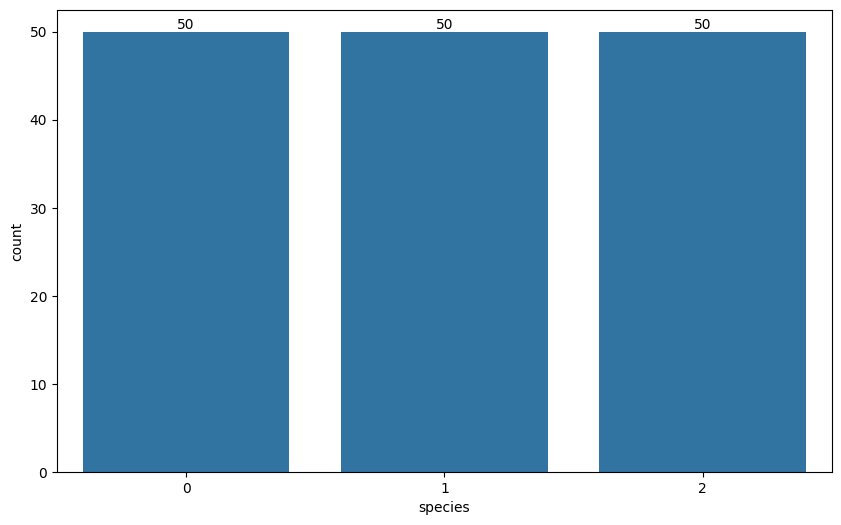

In [11]:
ax = sns.countplot(data = df, x ='species')
ax.bar_label(ax.containers[0]);

# sns.countplot(df["species"]);

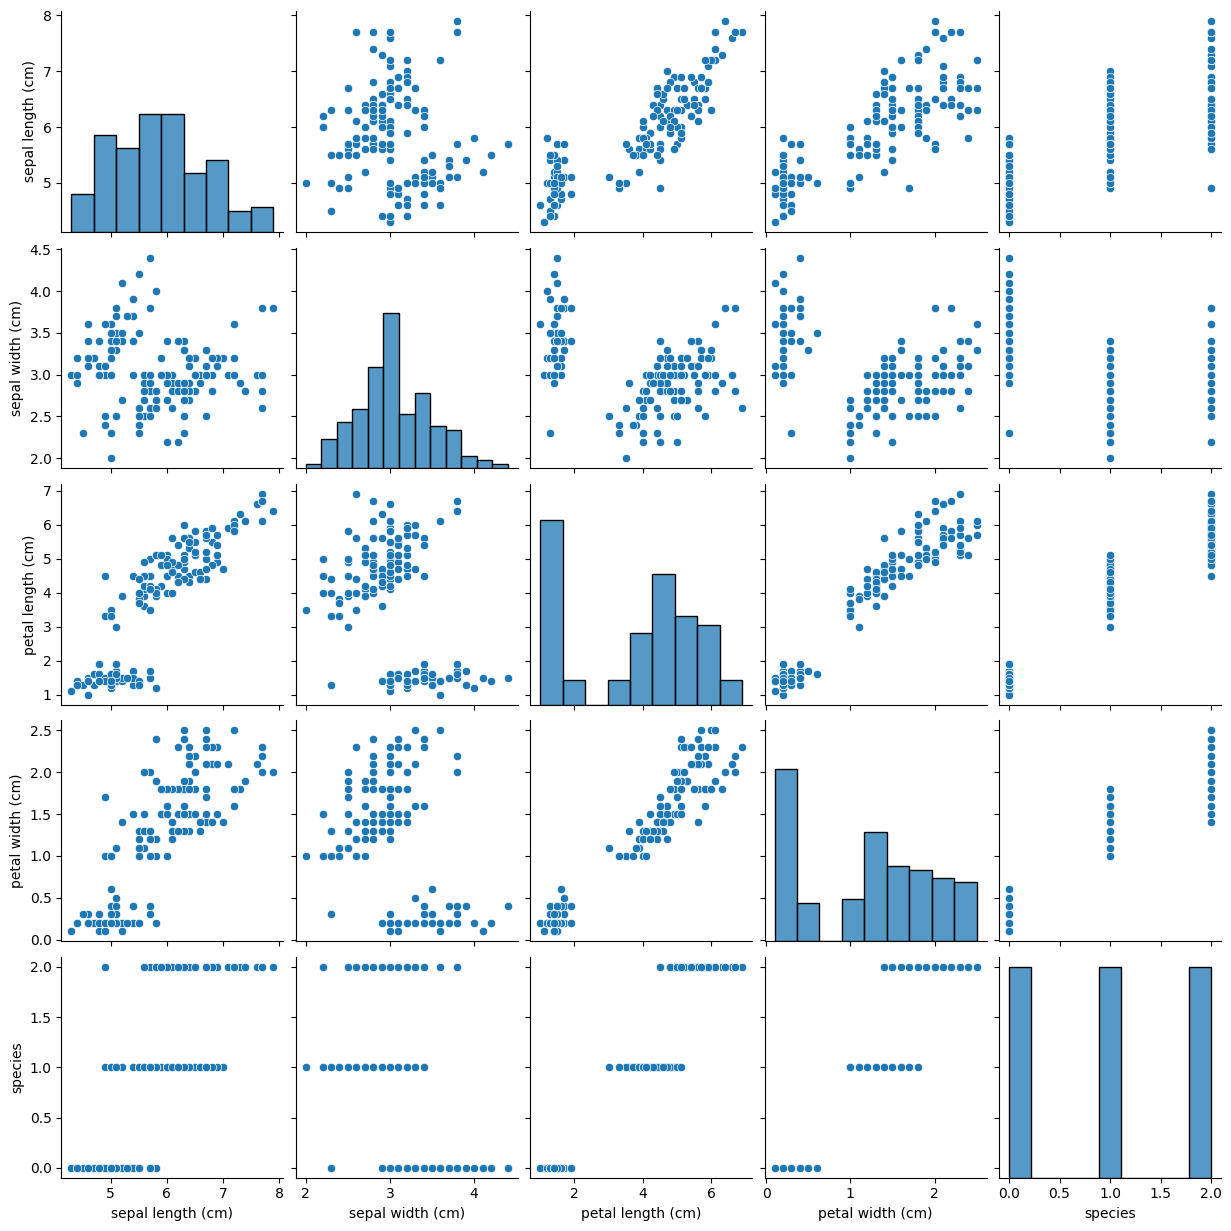

In [12]:
sns.pairplot(df);

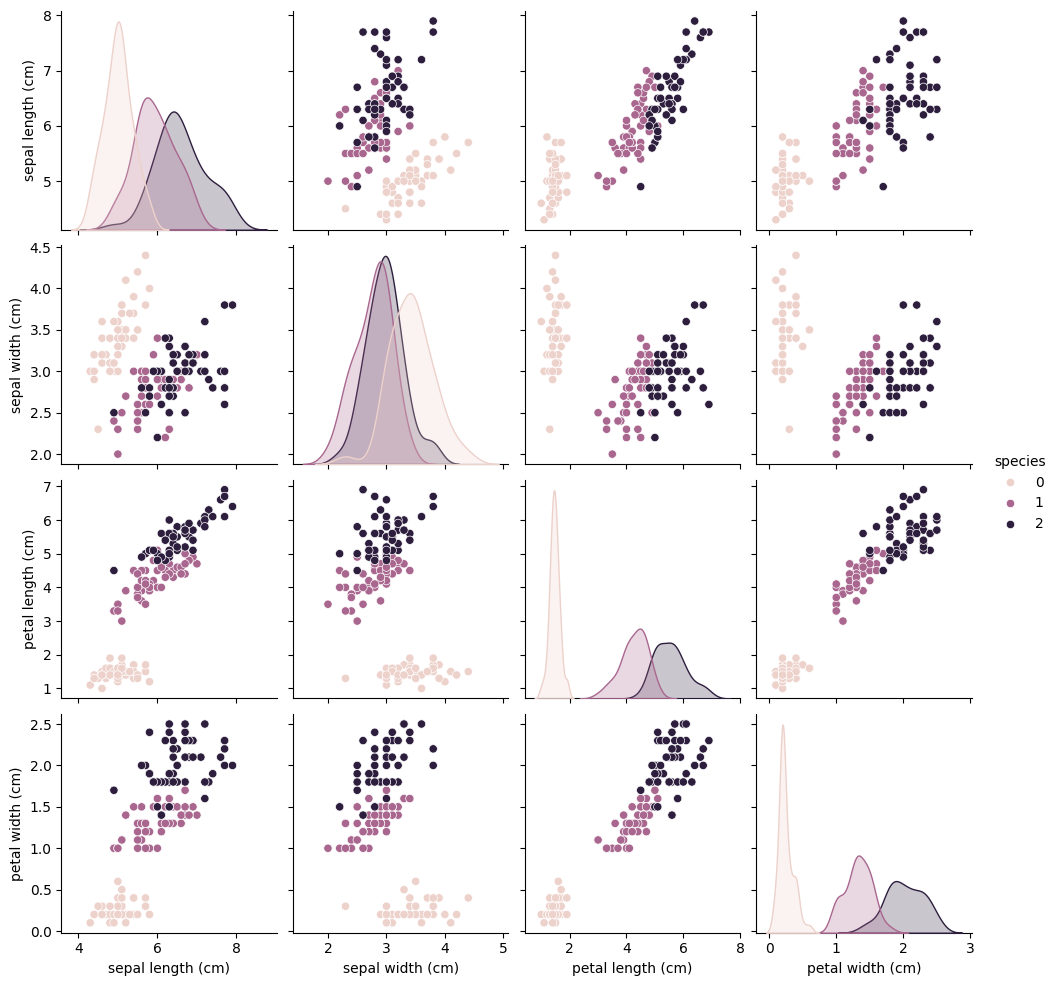

In [13]:
sns.pairplot(df, hue="species");

In [14]:
df_numeric = df.select_dtypes(include=[np.number])

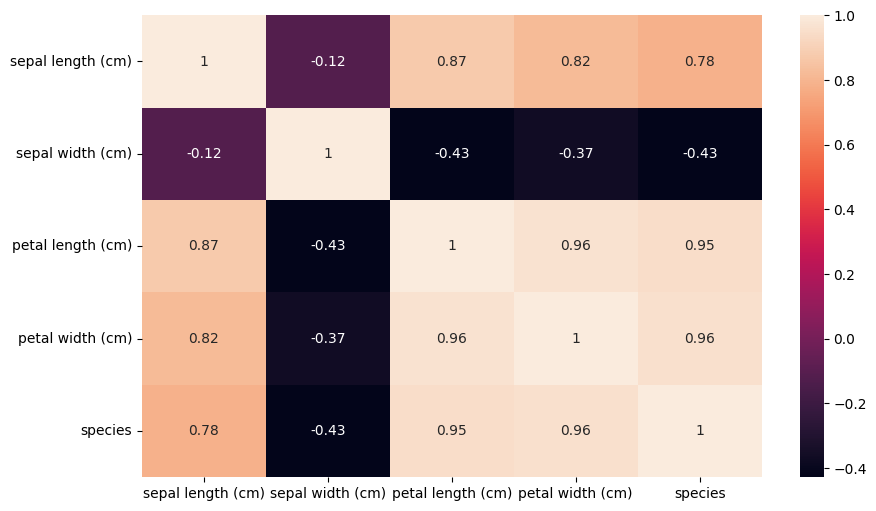

In [15]:
sns.heatmap(df_numeric.corr(), annot=True);

# sns.heatmap(df.corr(), annot =True)

In [16]:
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

In [17]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')

fig.update_layout(width=700, height=600)
fig.show()

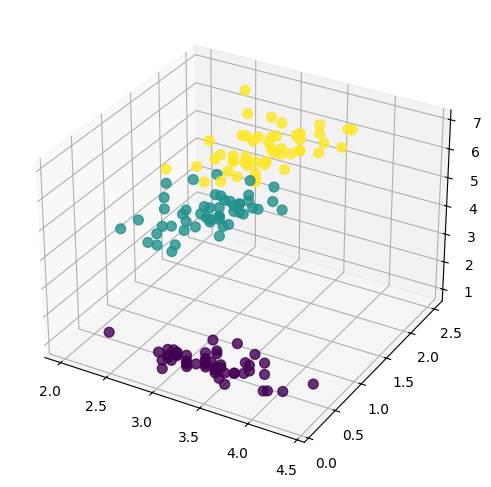

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = df["species"]  

scatter = ax.scatter(
    df["sepal width (cm)"], df["petal width (cm)"], df["petal length (cm)"], c=colors, cmap="viridis", s=50, alpha=0.8)

plt.show()

In [19]:
colors = df["species"]  
fig = px.scatter_3d(df,
                    x="sepal width (cm)",
                    y="petal width (cm)",
                    z="petal length (cm)",
                    color=colors,
                    )

# Increasing the size of the graph
fig.update_layout(width=1200, height=600)

fig.show()

# Train | Test Split and Scaling

In [20]:
X = df.drop("species", axis=1)
y = df["species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

# Modelling and Model Performance

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## With Default Parameters

**Iris Dataset and Confusion Matrix Analysis**

The Iris dataset is a classical dataset used for a multi-class classification problem. It classifies three different species of Iris flowers: **Iris setosa**, **Iris versicolor**, and **Iris virginica**. The **confusion matrix**, used to evaluate classification performance, is an important tool to assess how well the model distinguishes each class.

### **Structure of the Confusion Matrix**

The confusion matrix is a 3x3 matrix that shows how each class is confused with the others. Each row represents the actual class, while each column represents the predicted class.

### **Confusion Matrix Analysis for Iris Versicolor**

- **True Positive (TP) for Iris versicolor**: This is when the model correctly classifies samples that are actually Iris versicolor. In the confusion matrix, the cell where the row for Iris versicolor and the column for Iris versicolor intersect represents the number of True Positives (TP).
  
- **False Positive (FP) for Iris versicolor**: This occurs when the model incorrectly classifies a non-Iris versicolor flower (either Iris setosa or Iris virginica) as Iris versicolor. In the confusion matrix, the cells under the Iris versicolor column, but in the rows for Iris setosa or Iris virginica, represent the False Positives (FP).
  
- **False Negative (FN) for Iris versicolor**: This happens when the model incorrectly assigns an Iris versicolor flower to another class. In the confusion matrix, the cells under the rows for other species (e.g., Iris setosa or Iris virginica), but in the Iris versicolor column, represent the False Negatives (FN).

In [24]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

In [25]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [26]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

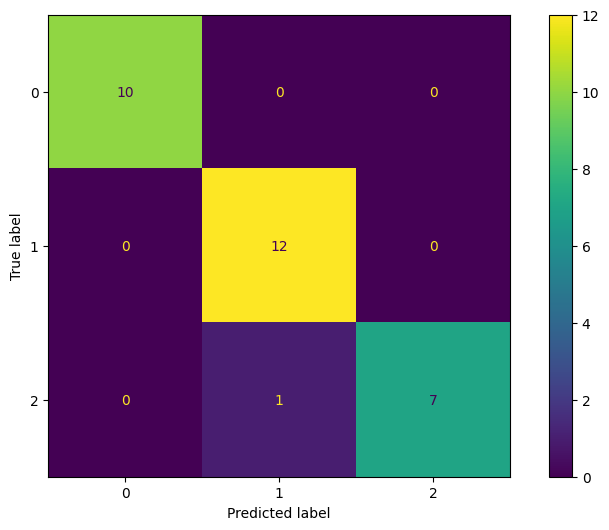

In [27]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)
# disp.ax_.grid(False)
plt.show()

In [28]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [29]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.95        38
           2       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

print("Macro Average Metrics")
print(f"Precision: {precision_macro:.3f}, Recall: {recall_macro:.3f}, F1-score: {f1_macro:.3f}")
print("---")
print("Micro Average Metrics")
print(f"Precision: {precision_micro:.3f}, Recall: {recall_micro:.3f}, F1-score: {f1_micro:.3f}")
print("---")
print("Weighted Average Metrics")
print(f"Precision: {precision_weighted:.3f}, Recall: {recall_weighted:.3f}, F1-score: {f1_weighted:.3f}")
print("---")
print(f"Accuracy: {accuracy:.3f}")

Macro Average Metrics
Precision: 0.974, Recall: 0.958, F1-score: 0.964
---
Micro Average Metrics
Precision: 0.967, Recall: 0.967, F1-score: 0.967
---
Weighted Average Metrics
Precision: 0.969, Recall: 0.967, F1-score: 0.966
---
Accuracy: 0.967


## Cross Validate

In [31]:
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# For multiclass datasets, we do not use precision, recall, and f1 metrics alone for CV or GridSearchCV.
# Instead, we should specify metrics like precision_weighted, precision_macro, precision_micro, etc., as shown above. 
# Otherwise, you will encounter an error.
# If we specifically want to see CV scores for a single class, we should use the make_scorer function as shown below.

test_accuracy              0.950
train_accuracy             0.964
test_precision_weighted    0.960
train_precision_weighted   0.964
test_recall_weighted       0.950
train_recall_weighted      0.964
test_f1_weighted           0.949
train_f1_weighted          0.964
dtype: float64

## Cross Validate for Versicolor

In [32]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

f1_versicolor = make_scorer(f1_score, average=None, labels=[1])

precision_versicolor = make_scorer(precision_score,
                                   average=None,
                                   labels=[1])

recall_versicolor = make_scorer(recall_score,
                                average=None,
                                labels=[1])

scoring = {
    "f1_versicolor": f1_versicolor,
    "precision_versicolor": precision_versicolor,
    "recall_versicolor": recall_versicolor
}

# In multiclass datasets,we can obtain CV scores based on your target label.
# Again,we must use the make_scorer function.
# When dealing with multiclass data,  we must specify the average and labels parameters in the make_scorer function.
# Label names must be provided as a list.
# If defining a scorer for a single class, set average to None.

In [33]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor           0.924
train_f1_versicolor          0.943
test_precision_versicolor    0.940
train_precision_versicolor   0.950
test_recall_versicolor       0.925
train_recall_versicolor      0.936
dtype: float64

In [34]:
y_pred=pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba = np.round(y_pred_proba, 2)

In [35]:
test_data = pd.concat([X_test, y_test], axis=1)

test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
88,5.600,3.000,4.100,1.300,1,1,0.100,0.850,0.060
97,6.200,2.900,4.300,1.300,1,1,0.020,0.900,0.080
96,5.700,2.900,4.200,1.300,1,1,0.050,0.880,0.070
41,4.500,2.300,1.300,0.300,0,0,0.580,0.420,0.000
31,5.400,3.400,1.500,0.400,0,0,0.940,0.060,0.000
80,5.500,2.400,3.800,1.100,1,1,0.020,0.950,0.030
122,7.700,2.800,6.700,2.000,2,2,0.000,0.030,0.970
50,7.000,3.200,4.700,1.400,1,1,0.010,0.850,0.140
42,4.400,3.200,1.300,0.200,0,0,0.980,0.020,0.000
16,5.400,3.900,1.300,0.400,0,0,0.990,0.010,0.000


## With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Logistic Regression Hyperparameters**

- **Penalty (penalty):** The type of regularization applied ('l1', 'l2', 'elasticnet', 'none').
- **Inverse of Regularization Strength (C):** The strength of regularization (smaller values imply stronger regularization).
- **Solver (solver):** The optimization algorithm used ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').
- **Maximum Number of Iterations (max_iter):** The maximum number of iterations for the optimization process.
- **Class Weight (class_weight):** The class weights to handle imbalanced classes ('balanced', {dict}, None).
- **Multi-class (multi_class):** Strategy for multi-class classification problems ('auto', 'ovr', 'multinomial').
  

In [36]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
model = Pipeline(steps=operations)

In [37]:
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

# To obtain 20 C values between -1 and 5
# As C increases, regularization decreases, similar to the inverse of alpha
# The reason for using np.logspace for C is that the optimal value of regularization is not usually within a specific range.
# Therefore, it makes sense to create values on a logarithmic scale to try different values over a wide range and find the one that gives the best result.
C = np.logspace(-1, 5, 20)

# Four values for the solver
# solver = ["lbfgs", "liblinear", "sag", "saga"]
# To obtain all combinations of penalty, C and solver

param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)  #  Adding l1_ratio for ElasticNet
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [ ]:
grid_model = GridSearchCV(model, param_grid=param_grid, cv = 5, return_train_score=True)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02,...
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True)

In [39]:
grid_model.best_params_


{'logistic__C': 16.23776739188721,
 'logistic__l1_ratio': 0.3333333333333333,
 'logistic__penalty': 'elasticnet',
 'logistic__solver': 'saga'}

In [41]:
y_pred = grid_model.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

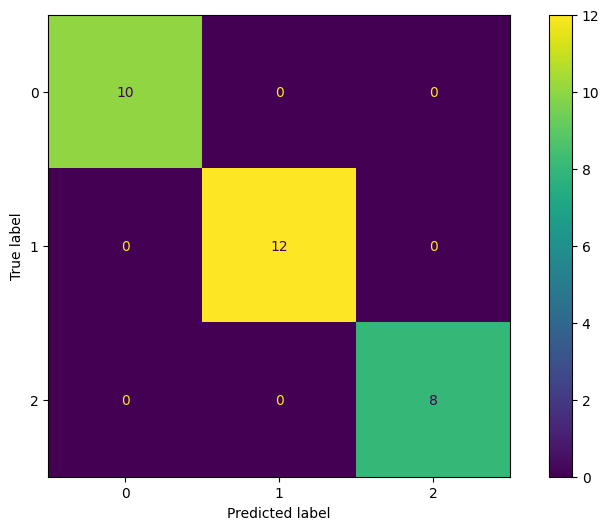

In [42]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)
plt.show()

In [43]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [44]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
# RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);
# plot_roc_curve(grid_model, X_test, y_test);
# "RocCurveDisplay" or "precision_recall_curve" does not work for multiclass data. It throws an error.

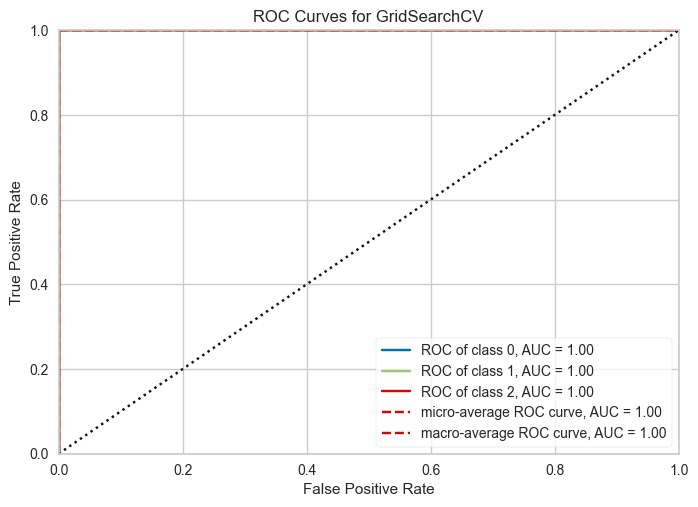

In [46]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

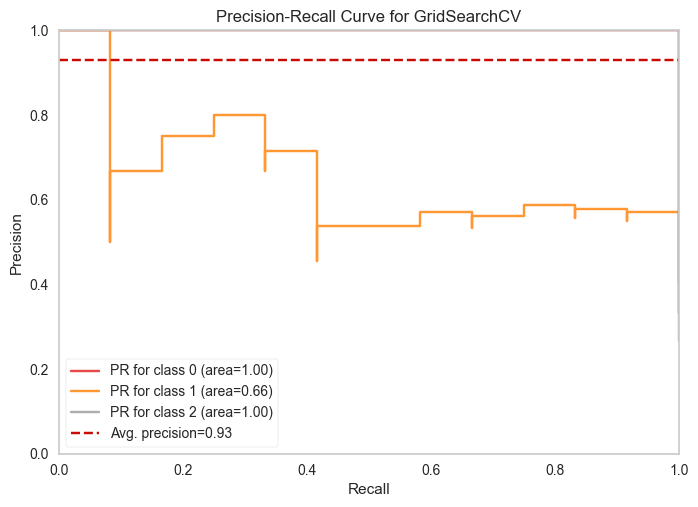

In [47]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model
viz = PrecisionRecallCurve(
    model,
    per_class=True, # if we don't write it here, it will work as a binary
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# Final Model and Model Deployment

In [48]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(
                                                                            C=16.23776739188721,
                                                                            l1_ratio=0.3333333333333333,
                                                                            max_iter=5000,
                                                                            penalty='elasticnet',
                                                                            solver='saga'))]
final_model = Pipeline(steps=operations)
final_model.fit(X, y)  #bütün datayı eğitiyorum

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=16.23776739188721,
                                    l1_ratio=0.3333333333333333, max_iter=5000,
                                    penalty='elasticnet', solver='saga'))])

In [49]:
import pickle

In [50]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [51]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [52]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal width (cm),150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal length (cm),150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal width (cm),150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


In [53]:
my_dict = {"sepal length (cm)": [4.2, 6.8, 5.5],
           "sepal width (cm)": [3.2, 2.7, 4],
           "petal length (cm)": [1.9, 5.1, 4.5],
           "petal width (cm)": [1.2, 0.5, 2]
          }

In [54]:
sample = pd.DataFrame(my_dict)
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.200,3.200,1.900,1.200
1,6.800,2.700,5.100,0.500
2,5.500,4.000,4.500,2.000


In [55]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [56]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.200,3.200,1.900,1.200,0,0.991,0.009,0.000
1,6.800,2.700,5.100,0.500,1,0.000,1.000,0.000
2,5.500,4.000,4.500,2.000,1,0.091,0.728,0.181
